In [2]:
import matplotlib.pyplot as plt
from pycaret.datasets import get_data
from pycaret.regression import *

In [3]:
df = get_data('data/initial_features')

df[['weight', 'pace']] = df['experimental_condition'].str.split('-', expand=True)

df['weight'] = df['weight'].str.replace('Condition ', '').astype(float)
df['pace'] = df['pace'].astype(int)

df['rpe'] = df['rpe'].fillna(method='ffill')
df['rpe'] = df['rpe'].astype(int)

,subject,experimental_condition,rpe,wrist_acc_time,wrist_acc_length,wrist_acc_mean,wrist_acc_rms,wrist_acc_mad,wrist_acc_std,wrist_acc_min,...,upperarm_acc_perc75,upperarm_jerk_mean,upperarm_jerk_rms,upperarm_jerk_mad,upperarm_jerk_std,upperarm_jerk_min,upperarm_jerk_max,upperarm_jerk_med,upperarm_jerk_perc25,upperarm_jerk_perc75
0,1,Condition 2.5-15,0.0,1.631984e+09,2952,1.017365,1.042456,0.153341,0.227376,0.426780,...,1.069009,3.213234,4.277703,2.170631,2.824283,0.014541,19.016887,2.537380,0.980603,4.603277
1,1,Condition 2.5-15,NaN,1.631984e+09,2414,1.019116,1.046801,0.166215,0.239201,0.481607,...,1.068065,3.316546,4.663319,2.295026,3.278950,0.036583,31.471509,2.540472,1.007865,4.469952
2,1,Condition 2.5-15,NaN,1.631984e+09,2374,1.020968,1.053935,0.183874,0.261596,0.478265,...,1.070394,3.510844,4.684816,2.225496,3.102505,0.027138,29.295564,2.826385,1.357187,4.803642
3,1,Condition 2.5-15,NaN,1.631984e+09,2455,1.015247,1.039529,0.167656,0.223415,0.452296,...,1.060520,2.882262,3.675835,1.761217,2.281765,0.024198,18.058972,2.464632,1.135283,4.091388
4,1,Condition 2.5-15,NaN,1.631984e+09,2502,1.022933,1.051561,0.167432,0.243747,0.396358,...,1.076664,3.635694,4.896867,2.419522,3.281058,0.029791,27.380172,2.791626,1.318934,4.934743


### General model

In [45]:
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

reg = setup(data=train, target='rpe')

In [46]:
best = compare_models(sort='MAE', include=['rf', 'gbr', 'dt'])
pull()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:56:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.9345,3.0468,1.7406,0.4826,0.5427,0.3465,3.369
rf,Random Forest Regressor,0.9504,1.8538,1.3568,0.6913,0.4518,0.2921,4.482
gbr,Gradient Boosting Regressor,1.2371,2.7433,1.6517,0.5418,0.5360,0.3965,3.794


In [6]:
rf_model = create_model('rf')
gbr_model = create_model('gbr')
dt_model = create_model('dt')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:51:49
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0694,2.2599,1.5033,0.6698,0.4715,0.3318
1,1.0409,1.9500,1.3964,0.6618,0.4610,0.3501
2,1.0255,2.1293,1.4592,0.6253,0.4902,0.3270
3,1.1315,2.5074,1.5835,0.6703,0.4634,0.3054
4,1.0772,2.4011,1.5495,0.5929,0.5442,0.3166
5,1.0119,1.8330,1.3539,0.6608,0.4210,0.3555
6,0.9618,1.7911,1.3383,0.6332,0.4472,0.3068
7,0.9625,2.0006,1.4144,0.6552,0.5206,0.2439
8,1.0098,2.0930,1.4467,0.5906,0.4819,0.3062


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:51:53
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3107,3.1556,1.7764,0.5389,0.5454,0.4095
1,1.3065,2.6474,1.6271,0.5408,0.5280,0.4396
2,1.2010,2.6619,1.6315,0.5316,0.5368,0.4060
3,1.3590,3.3510,1.8306,0.5594,0.5462,0.3787
4,1.3074,3.1154,1.7650,0.4718,0.6195,0.4002
5,1.2421,2.5735,1.6042,0.5237,0.4827,0.4505
6,1.2393,2.5572,1.5991,0.4764,0.5159,0.3922
7,1.2374,2.9082,1.7053,0.4988,0.5961,0.3414
8,1.1802,2.5284,1.5901,0.5055,0.5275,0.3818


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:52:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1902,4.4049,2.0988,0.3564,0.6046,0.4343
1,1.0617,3.5679,1.8889,0.3812,0.5657,0.4735
2,1.0309,3.8580,1.9642,0.3211,0.5905,0.3210
3,1.1852,3.8889,1.9720,0.4886,0.6222,0.3493
4,1.0864,3.0988,1.7603,0.4746,0.6343,0.3963
5,1.2160,3.4506,1.8576,0.3614,0.5668,0.4230
6,1.1173,3.5988,1.8970,0.2631,0.6312,0.4417
7,0.9321,2.6235,1.6197,0.5479,0.5693,0.3145
8,1.0988,4.0247,2.0062,0.2128,0.6173,0.3504


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
pred_rf = predict_model(rf_model, data=test)
pred_gbr = predict_model(gbr_model, data=test)
pred_dt = predict_model(dt_model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.0416,2.1078,1.4518,0.6563,0.4668,0.3247


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.2496,2.7672,1.6635,0.5487,0.5305,0.4143


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1.0656,3.5665,1.8885,0.4184,0.5899,0.4050


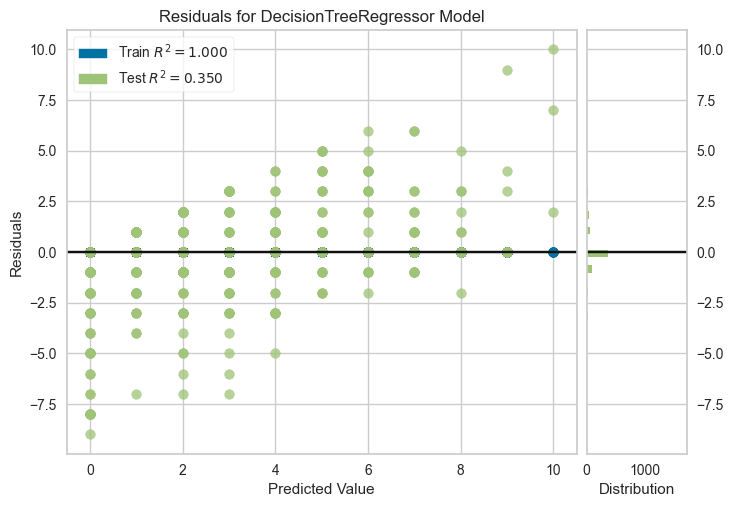

In [8]:
plot_model(dt_model)

In [19]:
# Tuning?
tuned_dt = tune_model(dt_model)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [20]:
pred_tuned_dt = predict_model(tuned_dt, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,2.3409,10.3567,3.2182,-0.6889,0.9785,0.6955


### Individual model

In [10]:
# Subject
SUBJECT_NUM = 1

df_subject = df[df['subject'] == SUBJECT_NUM]

train_subj = df_subject.sample(frac=0.8, random_state=42)
test_subj = df_subject.drop(train_subj.index)

reg_subj = setup(data=train_subj, target='rpe')

,Description,Value
0,Session id,4459
1,Target,rpe
2,Target type,Regression
3,Original data shape,"(224, 61)"
4,Transformed data shape,"(224, 64)"
5,Transformed train set shape,"(156, 64)"
6,Transformed test set shape,"(68, 64)"
7,Numeric features,59
8,Categorical features,1
9,Preprocess,True


In [11]:
best_subj = compare_models(sort='MAE', include=['rf', 'gbr', 'dt'])
pull()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:52:56
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.2600,0.3100,0.5208,0.6507,0.2793,0.1946,0.349
gbr,Gradient Boosting Regressor,0.2644,0.1684,0.3916,0.8079,0.2153,0.1603,0.413
rf,Random Forest Regressor,0.3378,0.2206,0.4486,0.7593,0.2594,0.1759,0.413


In [12]:
rf_model_subj = create_model('rf')
gbr_model_subj = create_model('gbr')
dt_model_subj = create_model('dt')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:53:10
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1775,0.0502,0.2241,0.9379,0.1567,0.1045
1,0.3131,0.1491,0.3861,0.7615,0.2291,0.2331
2,0.3544,0.2117,0.4601,0.8382,0.3028,0.0850
3,0.5025,0.4488,0.6699,0.6364,0.3197,0.2092
4,0.3306,0.1943,0.4408,0.8026,0.2706,0.1303
5,0.3075,0.2028,0.4504,0.6890,0.2516,0.1520
6,0.2213,0.0928,0.3046,0.8878,0.1852,0.1050
7,0.2440,0.1067,0.3266,0.8209,0.2161,0.1570
8,0.4640,0.3391,0.5824,0.5664,0.3367,0.3059


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:53:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2015,0.0892,0.2986,0.8897,0.2154,0.1262
1,0.2306,0.1066,0.3265,0.8294,0.1890,0.2097
2,0.1900,0.0674,0.2595,0.9485,0.1586,0.0718
3,0.3293,0.2418,0.4918,0.8041,0.2498,0.1576
4,0.3390,0.2840,0.5329,0.7115,0.2834,0.1561
5,0.2986,0.2620,0.5118,0.5984,0.2680,0.1553
6,0.1764,0.0533,0.2308,0.9356,0.1183,0.1104
7,0.1603,0.0616,0.2481,0.8966,0.1457,0.1167
8,0.3552,0.2215,0.4706,0.7169,0.2623,0.2612


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:53:19
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0625,0.0625,0.2500,0.9227,0.1733,0.0909
1,0.3125,0.3125,0.5590,0.5000,0.2667,0.3750
2,0.3125,0.3125,0.5590,0.7612,0.3248,0.1875
3,0.6250,0.8750,0.9354,0.2911,0.4910,0.2917
4,0.2500,0.3750,0.6124,0.6190,0.3098,0.1364
5,0.4375,0.5625,0.7500,0.1377,0.3403,0.3810
6,0.1333,0.1333,0.3651,0.8387,0.2531,0.0833
7,0.1333,0.1333,0.3651,0.7761,0.2074,0.1500
8,0.1333,0.1333,0.3651,0.8295,0.1938,0.1667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
pred_rf_subj = predict_model(rf_model_subj, data=test_subj)
pred_gbr_subj = predict_model(gbr_model_subj, data=test_subj)
pred_dt_subj = predict_model(dt_model_subj, data=test_subj)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.3100,0.1997,0.4469,0.7966,0.2410,0.1943


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.2697,0.1497,0.3869,0.8475,0.2038,0.1953


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.2143,0.2500,0.5000,0.7454,0.2544,0.1250


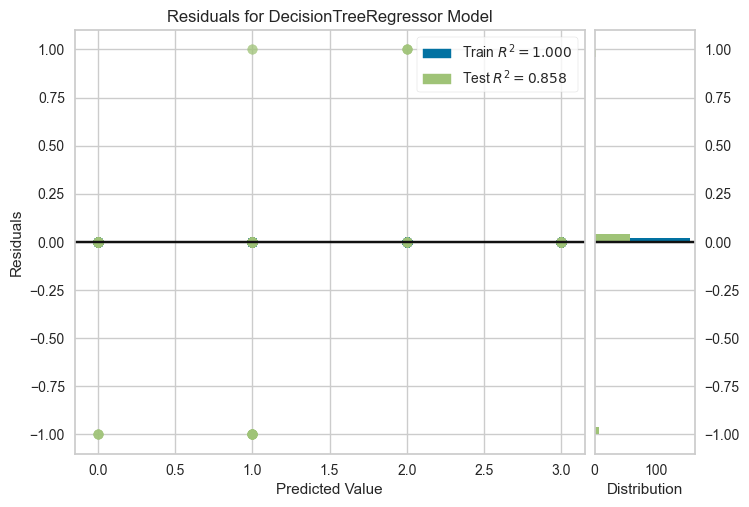

In [14]:
plot_model(dt_model_subj)

In [18]:
# Size of individual model dataset
df_subject.shape[0]

280

In [30]:
12/len(df['subject'].unique())

0.8571428571428571

In [34]:
from math import comb
comb(14,3)


364

In [36]:
subjects = df['subject'].unique()
subjects

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 12, 13, 15, 16, 17],
      dtype=int64)

In [ ]:
combos = []

while len(combos) < comb(14,3):
    # get random 3 subjects and save in tuple
    sample = (1, 3, 4)
    if sample 

In [40]:
from itertools import combinations

combinations_list = list(combinations(subjects, 3))
len(combinations_list)


# Start with 14 choose 1 to test code
# Columns with training and test sets

364